In [1]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import sys
import numpy as np
from sklearn.metrics import r2_score
sys.path.insert(0, '/Users/lhao/Documents/Git/py_Halo-GEM/ecpy')
# from curate_kcat import *

# from multiprocessing import Process,cpu_count,Manager

In [2]:
import curate_kcat_light_goslim_asc_step02 as step02
# import curate_kcat_light_goslim_asc_step03 as step03

In [3]:
from curate_kcat_light_goslim_asc_step2 import *
results02 = pickle.load(open('../Results/smc_abc_light_step_02.pkl','rb'))

# results03 = pickle.load(open('../Results/smc_abc_light_step_03.pkl','rb'))

In [4]:
dffrac_pro = pd.read_csv('../Results/protein_abundance_go_slim_level_uniq_asc.csv',index_col=0)
dffrac_mRNA = pd.read_excel('../proteomics/mRNA_abundance_go_slim.xlsx', sheet_name='Proteome',index_col=0, header=0)

dftot = pd.read_csv('../proteomics/total_protein_abandance_mean.csv',index_col=0)
dfpheno = pd.read_csv('../proteomics/phynotype.csv',index_col=0,comment='#')
dfomics = pd.read_csv('../proteomics/protein_abandance_mean.csv',index_col=0)
dfmws = pd.read_csv('../Results/protein_mws.csv',index_col=0)
dfmws = dfmws/1000

In [5]:
test_conds = []
for cond_id in dftot.index:
    if cond_id not in dfpheno.index:
        test_conds.append(cond_id)
        dfpheno.loc[cond_id,'P3HB'] = 0
print(test_conds)

['NACL20', 'NACL100', 'MU']


In [6]:
model_go_pools_file = '../Results/template_ecModel_goslim_pools.pkl'
model_go_pools = pickle.load(open(model_go_pools_file,'rb'))
    
eModel_file = '../Results/template_eModel.pkl'
eModel = pickle.load(open(eModel_file,'rb'))

Using license file /Users/lhao/gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpm02fjt6d.lp
Reading time = 0.05 seconds
: 3871 rows, 9656 columns, 39458 nonzeros
Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpsy2katsd.lp
Reading time = 0.04 seconds
: 3833 rows, 9362 columns, 36608 nonzeros


In [7]:
step02_results = dict() # {cond_id:[]*100}
for kcat in results02.population:
    for cond_id in test_conds:
        r = step02.test_model(
                       model_go_pools,
                       kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
                       dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
                       dfpheno,        # contains the P3HB specific synthetic rate
                       dffrac_mRNA,
                       cond_id)
        step02_results[cond_id] = step02_results.get(cond_id,[]) + [r[1]]


Condition: NACL20
Results with pha ngam:
  Status        : optimal
  growth_rate   : 0.02010659013611166
  glucose uptake: 0.015073860238136092
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707157
  Protein pool  : 2.3590319721341873e-07
  Protein pool  : 0.0006342531775590823
  Protein pool  : 6.209777976161671e-05
  Protein pool  : 0.0
  Protein pool  : 8.63094142224261e-07
  Protein pool  : 8.160359916355398e-07
  Protein pool  : 1.6925934108610517e-06
  Protein pool  : 4.375906203813785e-05
  Protein pool  : 4.379727173361834e-05
  Protein pool  : 9.270886964521961e-06
  Protein pool  : 2.3385773502719992e-05
  Protein pool  : 0.0008190772078289509
  Protein pool  : 0.00040323611832732777
  Protein pool  : 8.241107686827473e-05
  Protein pool  : 0.00032496865051664557
  Protein pool  : 0.0008832494853432343
  Protein pool  : 3.510902508538961e-05
  Protein pool  : 0.00010510755600462373
  Protein pool  : 6.956826142095393e-05
  Protein pool  : 4.41

/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


In [8]:
# step03_results = dict() # {cond_id:[]*100}
# for kcat in results03.population:
#     for cond_id in test_conds:
#         r = step03.test_model(#model_one_pool,      # json format
#                eModel,
#                kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
#                dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
#                dfpheno,        # contains the P3HB specific synthetic rate
#                cond_id,   # condition id
#                dfomics,
#                dfmws
#                 )
#         step03_results[cond_id] = step03_results.get(cond_id,[]) + [r[1]]
#

In [18]:
pickle.dump([step02_results,0],open('../Results/validation_growth_on_unused_conditions_mRNA.pkl','wb'))

In [10]:
data1 = [step02_results[item] for item in test_conds]
# data2 = [step03_results[item] for item in test_conds]
pos = np.arange(len(data1))*3

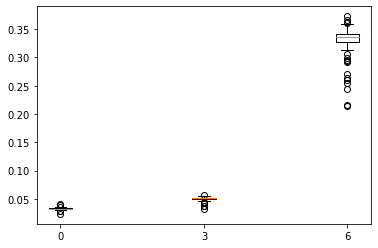

In [11]:
plt.boxplot(data1,positions=pos)
# plt.boxplot(data2,positions=pos+1)
plt.show()

### Prior models

In [12]:
step02_results_prior = dict() # {cond_id:[]*100}
for kcat in results02.population_t0:
    for cond_id in test_conds:
        r = step02.test_model(
                       model_go_pools,
                       kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
                       dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
                       dfpheno,        # contains the P3HB specific synthetic rate
                       dffrac_mRNA,
                       cond_id)
        step02_results_prior[cond_id] = step02_results_prior.get(cond_id,[]) + [r[1]]


Condition: NACL20
Results with pha ngam:
  Status        : infeasible
  growth_rate   : -1
  glucose uptake: 0.0
  PHA           : 0.0
  NGAM: 6.86
   PHA: 0.0
  Protein pool  : 0.0009949633139707157
  Protein pool  : 2.3590319721341873e-07
  Protein pool  : 0.0006342531775590823
  Protein pool  : 6.209777976161671e-05
  Protein pool  : 0.0
  Protein pool  : 8.63094142224261e-07
  Protein pool  : 8.160359916355398e-07
  Protein pool  : 1.6925934108610517e-06
  Protein pool  : 4.375906203813785e-05
  Protein pool  : 4.379727173361834e-05
  Protein pool  : 9.270886964521961e-06
  Protein pool  : 2.3385773502719992e-05
  Protein pool  : 0.0008190772078289509
  Protein pool  : 0.00040323611832732777
  Protein pool  : 8.241107686827473e-05
  Protein pool  : 0.00032496865051664557
  Protein pool  : 0.0008832494853432343
  Protein pool  : 3.510902508538961e-05
  Protein pool  : 0.00010510755600462373
  Protein pool  : 6.956826142095393e-05
  Protein pool  : 4.4190337652649834e-05
  Protein po

/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)
/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'numeric'
  warn("solver status is '{}'".format(status), UserWarning)


In [13]:
# step03_results_prior = dict() # {cond_id:[]*100}
# for kcat in results03.population_t0:
#     for cond_id in test_conds:
#         r = step03.test_model(#model_one_pool,      # json format
#                eModel,
#                kcat,          # kcats: dict() {(rxn_id, prot_met_id): kcat in h-1}
#                dftot,          # contains the total protein abandance, in the unit of gram protein/gram CDW
#                dfpheno,        # contains the P3HB specific synthetic rate
#                cond_id,   # condition id
#                dfomics,
#                dfmws
#                 )
#         step03_results_prior[cond_id] = step03_results_prior.get(cond_id,[]) + [r[1]]
#

In [19]:
pickle.dump([step02_results_prior,0],open('../Results/validation_growth_on_unused_conditions_mRNA_prior.pkl','wb'))

In [15]:
# [val02_mRNA,_] = pickle.load(open('../Results/validation_growth_on_unused_conditions_mRNA.pkl','rb'))
# [val_prior02_mRNA,_] = pickle.load(open('../Results/validation_growth_on_unused_conditions_mRNA_prior.pkl','rb'))


val02_mRNA = step02_results
val_prior02_mRNA = step02_results_prior

def collect_data(res):
    res_with = {}
    res_without = {}

    for p in res:
        for k,lst in p.items():
            lst = lst.copy()
            for i in range(len(lst)):
                if lst[i]<0: lst[i] = 0
            res_with[k] = res_with.get(k,[]) + [lst[0]]
            try:res_without[k] = res_without.get(k,[]) + [lst[1]]
            except: None

    return res_with,res_without


def plot_dot_bar(data,positions,label=None,color=None):
    data = np.array(data)
    data[data==-1] = 0
    means = np.mean(data,axis=1)

    plt.bar(positions,means,label=label,color=color)
    rep_x = []
    for item in positions: rep_x += [item for _ in range(data.shape[1])]
    p_rep_x = rep_x + np.random.normal(scale=0.1,size=len(rep_x))

    plt.scatter(p_rep_x,data.flatten(),s=2,zorder=3,color='gray')



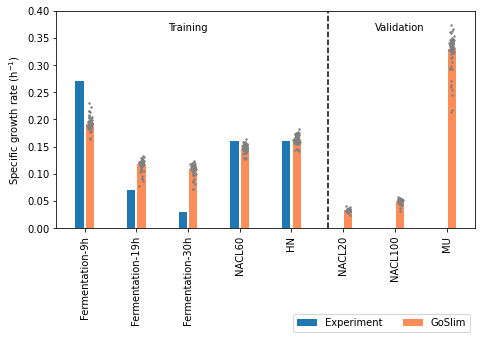

In [22]:
# training data
res_train_02,_ = collect_data(results02.simulated_data)
# res_train_03,_ = collect_data(results03.simulated_data)

res_train_prior_02,_ = collect_data(results02.simulated_data_t0)
# res_train_prior_03,_ = collect_data(results03.simulated_data_t0)

train_ids = list(res_train_02.keys())
val_ids = list(val02_mRNA.keys())
train_ids,val_ids

prior_data02_mRNA = [res_train_prior_02[item] for item in train_ids] + [val_prior02_mRNA[item] for item in val_ids]
# prior_data03 = [res_train_prior_03[item] for item in train_ids] + [val_prior03[item] for item in val_ids]
post_data02_mRNA = [res_train_02[item] for item in train_ids] + [val02_mRNA[item] for item in val_ids]
# post_data03 = [res_train_03[item] for item in train_ids] + [val03[item] for item in val_ids]

pos = np.arange(len(prior_data02_mRNA))*5
plt.figure(figsize=(7.5,4))
#plot_dot_bar(prior_data02,positions=pos,label='Prior02')
#plot_dot_bar(prior_data03,positions=pos+1,label='Prior03')
exp_data = [results02.datasets['dfpheno'].loc[item,'SpecificGrowthRate'] for item in train_ids]
plt.bar(pos[:len(exp_data)],exp_data,label='Experiment')
# plot_dot_bar(post_data03,positions=pos+1,label='Individual',color='#91cf60')
plot_dot_bar(post_data02_mRNA,positions=pos+1,label='GoSlim',color='#fc8d59')

ylim=(0,0.4)
plt.plot([pos[4]+4]*2,ylim,'k--')

plt.ylim(ylim)
plt.xticks(pos+0.5,train_ids+val_ids,rotation=90)
plt.legend(bbox_to_anchor=(1.0,-0.5),ncol=2,loc='lower right')
plt.ylabel('Specific growth rate (h$^{-1}$)')

plt.text(pos[2]+0.5,0.37,'Training',ha='center',va='center')
plt.text(pos[6]+1,0.37,'Validation',ha='center',va='center')
# plt.savefig('../figures/train_validation_02_03.pdf',bbox_inches='tight')
plt.show()


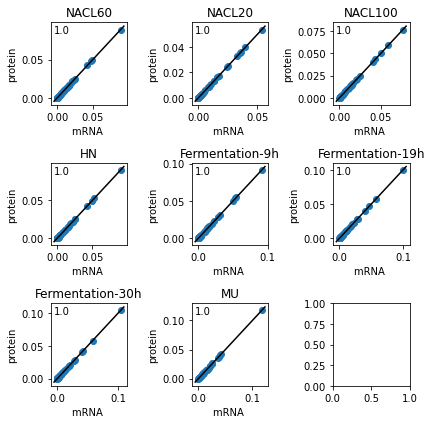

In [31]:
# dffrac_pro
# dffrac_mRNA

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
lim = [-1,9]

for i,cond_id in enumerate(dftot.index):
    ax_i = axs[i//3,i%3]
    x_i = dffrac_mRNA['MassFrac_'+cond_id]
    y_i = dffrac_pro['MassFrac_'+cond_id]
    ax_i.scatter(x_i,y_i)
    ax_i.text(ax_i.get_xlim()[0], ax_i.get_ylim()[1]*0.9, r2_score(x_i,y_i))
    lim = [min(ax_i.get_ylim()[0],ax_i.get_xlim()[0]),max(ax_i.get_ylim()[1],ax_i.get_xlim()[1])]

    ax_i.plot(lim, lim, 'black')

    ax_i.set_xlabel('mRNA ')
    ax_i.set_ylabel('protein')
    ax_i.set_title(cond_id)
plt.tight_layout()
plt.show()

post error Fermentation-19h
prior error Fermentation-19h
post error Fermentation-30h
prior error Fermentation-30h
post error MU
prior error MU


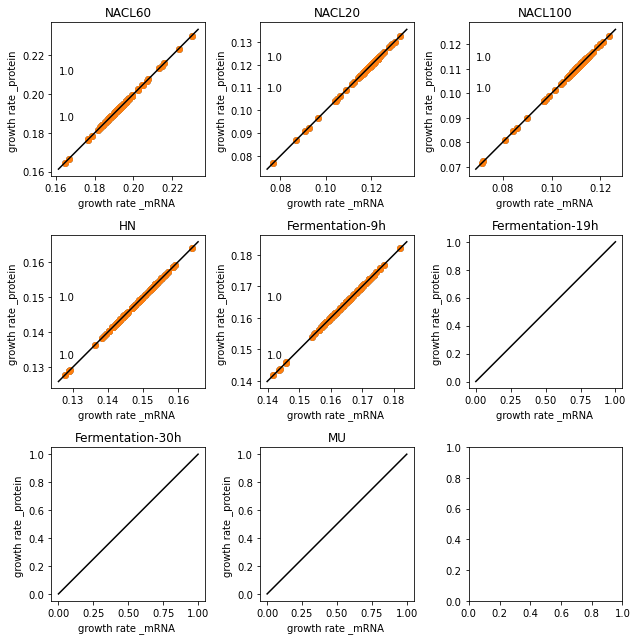

In [29]:
[val02_pro,_] = pickle.load(open('../Results/validation_growth_on_unused_conditions.pkl','rb'))
[val_prior02_pro,_] = pickle.load(open('../Results/validation_growth_on_unused_conditions_prior.pkl','rb'))

val_ids = list(val02_pro.keys())
prior_data02_pro = [res_train_prior_02[item] for item in train_ids] + [val_prior02_pro[item] for item in val_ids]
# prior_data03 = [res_train_prior_03[item] for item in train_ids] + [val_prior03[item] for item in val_ids]
post_data02_pro = [res_train_02[item] for item in train_ids] + [val_prior02_pro[item] for item in val_ids]
# post_data03 = [res_train_03[item] for item in train_ids] + [val03[item] for item in val_ids]


fig, axs = plt.subplots(3, 3, figsize=(9, 9))
lim = [-1,9]

for i,cond_id in enumerate(dftot.index):
    ax_i = axs[i//3,i%3]
    x_i = post_data02_pro[i]
    y_i = post_data02_mRNA[i]
    try:
        ax_i.scatter(x_i,y_i)
        ax_i.text(ax_i.get_xlim()[0], ax_i.get_ylim()[1]*0.9, r2_score(x_i,y_i))
    except:
        print('post error',cond_id)
    x_ii = prior_data02_pro[i]
    y_ii = prior_data02_mRNA[i]
    try:
        ax_i.scatter(x_i,y_i)
        ax_i.text(ax_i.get_xlim()[0], ax_i.get_ylim()[1]*0.8, r2_score(x_i,y_i))
    except:
        print('prior error',cond_id)
    lim = [min(ax_i.get_ylim()[0],ax_i.get_xlim()[0]),max(ax_i.get_ylim()[1],ax_i.get_xlim()[1])]

    ax_i.plot(lim, lim, 'black')

    ax_i.set_xlabel('growth rate _mRNA ')
    ax_i.set_ylabel('growth rate _protein ')
    ax_i.set_title(cond_id)
plt.tight_layout()
plt.show()
